Authored by: Aditya Choudhary [2020489]

In [19]:
import csv
import os
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re
from nltk import ngrams
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#pip install wordcloud

In [3]:
def read_csv(file_path):
    documents = []
    with open(file_path, 'r', encoding='utf-8') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            documents.append(row)
    return documents

In [4]:
dir_path = os.path.join(os.getcwd(), 'res', 'csv_etl_files')
csv_files = os.listdir(dir_path)
file_paths = [os.path.join(dir_path, file) for file in csv_files]

In [5]:
dataset = []
dataset_maplist = []

for file in file_paths:
        #print(file)
        documents = read_csv(file)
        dataset.extend(documents)
        dataset_maplist.extend([file] * len(documents))

In [20]:
#dataset

In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


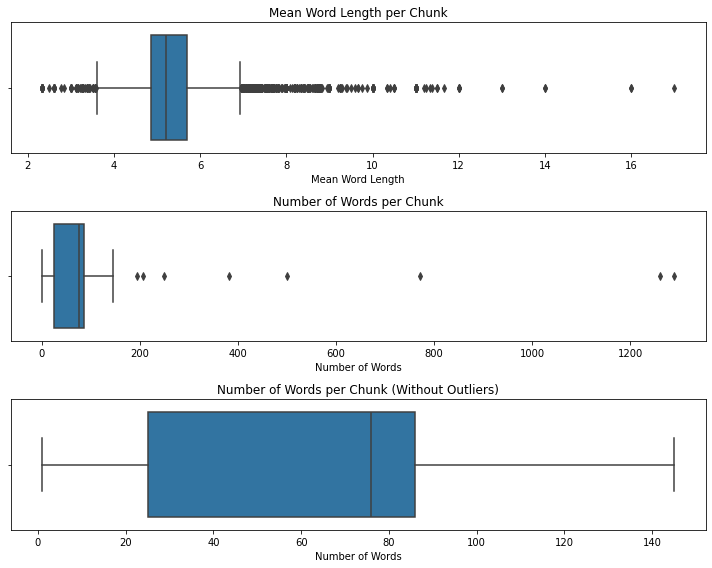

In [8]:
paragraph_texts = [re.sub(r'[^a-zA-Z\s]', '', d['Paragraph Text'].lower()) for d in dataset]

mean_word_lengths = [sum(len(word) for word in text.split()) / len(text.split()) for text in paragraph_texts]
num_words = [len(text.split()) for text in paragraph_texts]

q1, q3 = np.percentile(num_words, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
num_words_no_outliers = [num for num in num_words if num >= lower_bound and num <= upper_bound]

fig, axs = plt.subplots(3, figsize=(10, 8))

sns.boxplot(x=mean_word_lengths, ax=axs[0])
axs[0].set_title('Mean Word Length per Chunk')
axs[0].set_xlabel('Mean Word Length')

sns.boxplot(x=num_words, ax=axs[1])
axs[1].set_title('Number of Words per Chunk')
axs[1].set_xlabel('Number of Words')

sns.boxplot(x=num_words_no_outliers, ax=axs[2])
plt.title('Number of Words per Chunk (Without Outliers)')
plt.xlabel('Number of Words')

plt.tight_layout()
plt.show()

In [9]:
#words = [word.lower() for d in dataset for word in d['Paragraph Text'].split()]
#filtered_words = [word for word in words if word not in stop_words]
#word_counts = Counter(filtered_words)
#most_common_words = word_counts.most_common(10)
#words, frequencies = zip(*most_common_words)

In [10]:
paragraph_texts = [re.sub(r'[^a-zA-Z\s]', '', d['Paragraph Text'].lower()) for d in dataset]

words = [word for text in paragraph_texts for word in text.split()]
common_words = {'the', 'and', 'to', 'of', 'in', 'a', 'is', 'it', 'for', 'on', 'be', 'as', 'with', 'by', 'or', 'that', 'which', 'this', 'an', 'are', 'from', 'at', 'not', 'have', 'has', 'been', 'such', 'shall', 'if', 'any', 'all', 'no', 'other', 'under', 'may', 'but', 'than', 'where', 'who', 'whom', 'whose', 'when', 'which', 'how', 'why', 'what', 'whether', 'while', 'before', 'after', 'during', 'until', 'unless', 'because', 'since', 'so', 'though', 'although', 'even', 'if', 'then', 'than', 'just', 'once', 'here', 'there', 'now', 'about', 'above', 'below', 'over', 'under', 'again', 'further', 'more', 'most', 'least', 'only', 'very', 'too', 'also', 'either', 'neither', 'both', 'one', 'another', 'each', 'every', 'such', 'that', 'these', 'those', 'they', 'he', 'she', 'it', 'its', 'him', 'her', 'his', 'they', 'them', 'their', 'there', 'here', 'this', 'that', 'these', 'those', 'my', 'mine', 'our', 'ours', 'your', 'yours', 'his', 'her', 'hers', 'its', 'their', 'theirs', 'who', 'whom', 'which', 'what', 'whose', 'where', 'when', 'why', 'how', 'few', 'many', 'much', 'little', 'more', 'less', 'least', 'most', 'some', 'any', 'no', 'each', 'every', 'either', 'neither', 'all', 'both', 'other', 'another', 'such', 'several', 'enough', 'whatever', 'whichever', 'whoever', 'whomever', 'whatever', 'whenever', 'wherever', 'however', 'whyever', 'about', 'above', 'across', 'after', 'against', 'along', 'among', 'around', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'by', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'near', 'next', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'past', 'through', 'throughout', 'to', 'toward', 'under', 'until', 'up', 'upon', 'with', 'within', 'without', 'a', 'an', 'the', 'as', 'at', 'by', 'down', 'for', 'from', 'in', 'into', 'like', 'near', 'of', 'off', 'on', 'onto', 'out', 'over', 'past', 'through', 'to', 'under', 'up', 'upon', 'with', 'about', 'above', 'across', 'after', 'against', 'among', 'around', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'by', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'near', 'next', 'off', 'on', 'out', 'outside', 'over', 'past', 'through', 'to', 'toward', 'under', 'up', 'upon', 'with', 'within', 'without', 'underneath', 'aboard', 'alongside', 'amid', 'amongst', 'astride', 'atop', 'inside', 'onto', 'out', 'outside', 'over', 'per', 'throughout', 'toward', 'upon', 'versus', 'via'}
filtered_words = [word for word in words if word and word not in common_words]

word_counts = Counter(filtered_words)
most_common_oov = word_counts.most_common(10)
words, frequencies = zip(*most_common_oov)

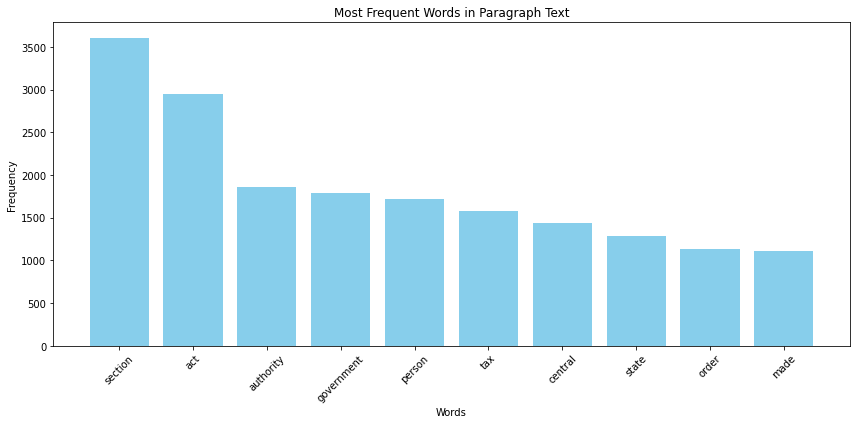

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words in Paragraph Text')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

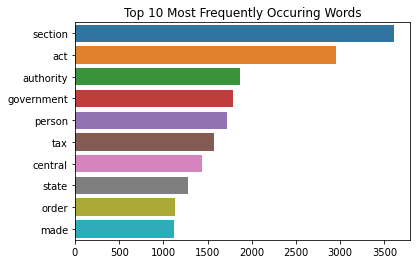

In [12]:
sns.barplot(x=list(frequencies), y=list(words))
#sns.set_theme(rc={'figure.figsize':(10,5)})
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [13]:
paragraph_texts = [re.sub(r'[^a-zA-Z\s]', '', d['Paragraph Text'].lower()) for d in dataset]

words = [word_tokenize(text) for text in paragraph_texts]
words = [word for sublist in words for word in sublist]

common_words = {'the', 'and', 'to', 'of', 'in', 'a', 'is', 'it', 'for', 'on', 'be', 'as', 'with', 'by', 'or', 'that', 'which', 'this', 'an', 'are', 'from', 'at', 'not', 'have', 'has', 'been', 'such', 'shall', 'if', 'any', 'all', 'no', 'other', 'under', 'may', 'but', 'than', 'where', 'who', 'whom', 'whose', 'when', 'which', 'how', 'why', 'what', 'whether', 'while', 'before', 'after', 'during', 'until', 'unless', 'because', 'since', 'so', 'though', 'although', 'even', 'if', 'then', 'than', 'just', 'once', 'here', 'there', 'now', 'about', 'above', 'below', 'over', 'under', 'again', 'further', 'more', 'most', 'least', 'only', 'very', 'too', 'also', 'either', 'neither', 'both', 'one', 'another', 'each', 'every', 'such', 'that', 'these', 'those', 'they', 'he', 'she', 'it', 'its', 'him', 'her', 'his', 'they', 'them', 'their', 'there', 'here', 'this', 'that', 'these', 'those', 'my', 'mine', 'our', 'ours', 'your', 'yours', 'his', 'her', 'hers', 'its', 'their', 'theirs', 'who', 'whom', 'which', 'what', 'whose', 'where', 'when', 'why', 'how', 'few', 'many', 'much', 'little', 'more', 'less', 'least', 'most', 'some', 'any', 'no', 'each', 'every', 'either', 'neither', 'all', 'both', 'other', 'another', 'such', 'several', 'enough', 'whatever', 'whichever', 'whoever', 'whomever', 'whatever', 'whenever', 'wherever', 'however', 'whyever', 'about', 'above', 'across', 'after', 'against', 'along', 'among', 'around', 'at', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'by', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'near', 'next', 'of', 'off', 'on', 'onto', 'out', 'outside', 'over', 'past', 'through', 'throughout', 'to', 'toward', 'under', 'until', 'up', 'upon', 'with', 'within', 'without', 'a', 'an', 'the', 'as', 'at', 'by', 'down', 'for', 'from', 'in', 'into', 'like', 'near', 'of', 'off', 'on', 'onto', 'out', 'over', 'past', 'through', 'to', 'under', 'up', 'upon', 'with', 'about', 'above', 'across', 'after', 'against', 'among', 'around', 'before', 'behind', 'below', 'beneath', 'beside', 'between', 'by', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'near', 'next', 'off', 'on', 'out', 'outside', 'over', 'past', 'through', 'to', 'toward', 'under', 'up', 'upon', 'with', 'within', 'without', 'underneath', 'aboard', 'alongside', 'amid', 'amongst', 'astride', 'atop', 'inside', 'onto', 'out', 'outside', 'over', 'per', 'throughout', 'toward', 'upon', 'versus', 'via'}
filtered_words = [word for word in words if word and word not in common_words]
filtered_bigrams = [bigram for bigram in ngrams(filtered_words, 2) if 'section' not in bigram]

bigram_counts = Counter(filtered_bigrams)
most_common_bigrams = bigram_counts.most_common(10)
bigrams, frequencies = zip(*most_common_bigrams)

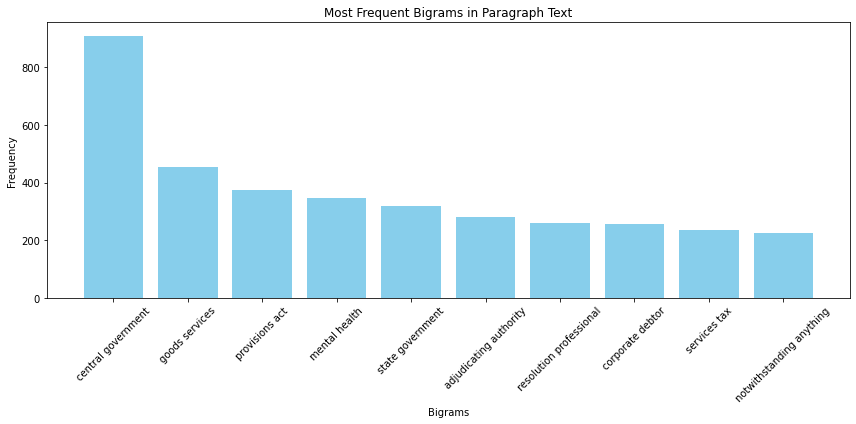

In [14]:
plt.figure(figsize=(12, 6))
plt.bar([" ".join(bigram) for bigram in bigrams], frequencies, color='skyblue')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Most Frequent Bigrams in Paragraph Text')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

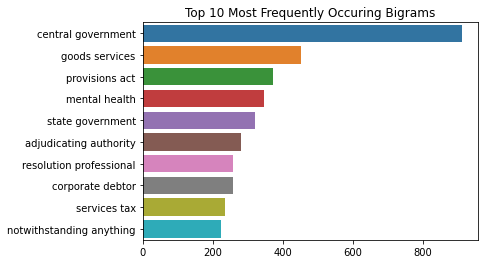

In [15]:
sns.barplot(x=list(frequencies), y=list([" ".join(bigram) for bigram in bigrams]))
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [16]:
most_common_bigrams2 = bigram_counts.most_common(50)
bigrams2, frequencies2 = zip(*most_common_bigrams2)

bi_gram=list([" ".join(bigram) for bigram in bigrams2])

d = {}
for i in range(0,len(most_common_bigrams2)):
    d[bi_gram[i]] = frequencies2[i]

In [17]:
#path=os.path.join(os.getcwd(), 'res')
#ttf_path=path+"\\RedditMono-VariableFont_wght.ttf"
#ttf_path

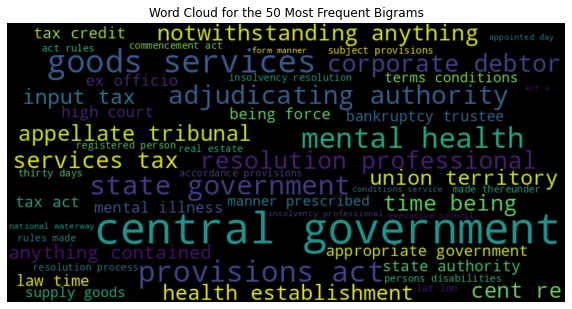

In [18]:
wordcloud = WordCloud(width=800, height=400) #background_color='white'
wordcloud.generate_from_frequencies(frequencies=d,)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for the 50 Most Frequent Bigrams')
plt.show()